In [2]:
from sklearn.metrics import classification_report, confusion_matrix
from utils import mnist_reader
from timeit import default_timer as timer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from ast import literal_eval

import scikitplot as skplt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

In [3]:

def show_image(pixels, label, color ="gray"):
    pixels = pixels.reshape((28,28))
    plt.imshow(pixels, cmap=color)
    plt.show()
    

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.rcParams["figure.figsize"] = [8, 5]
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [4]:

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

class_names = np.unique(y_test)


/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


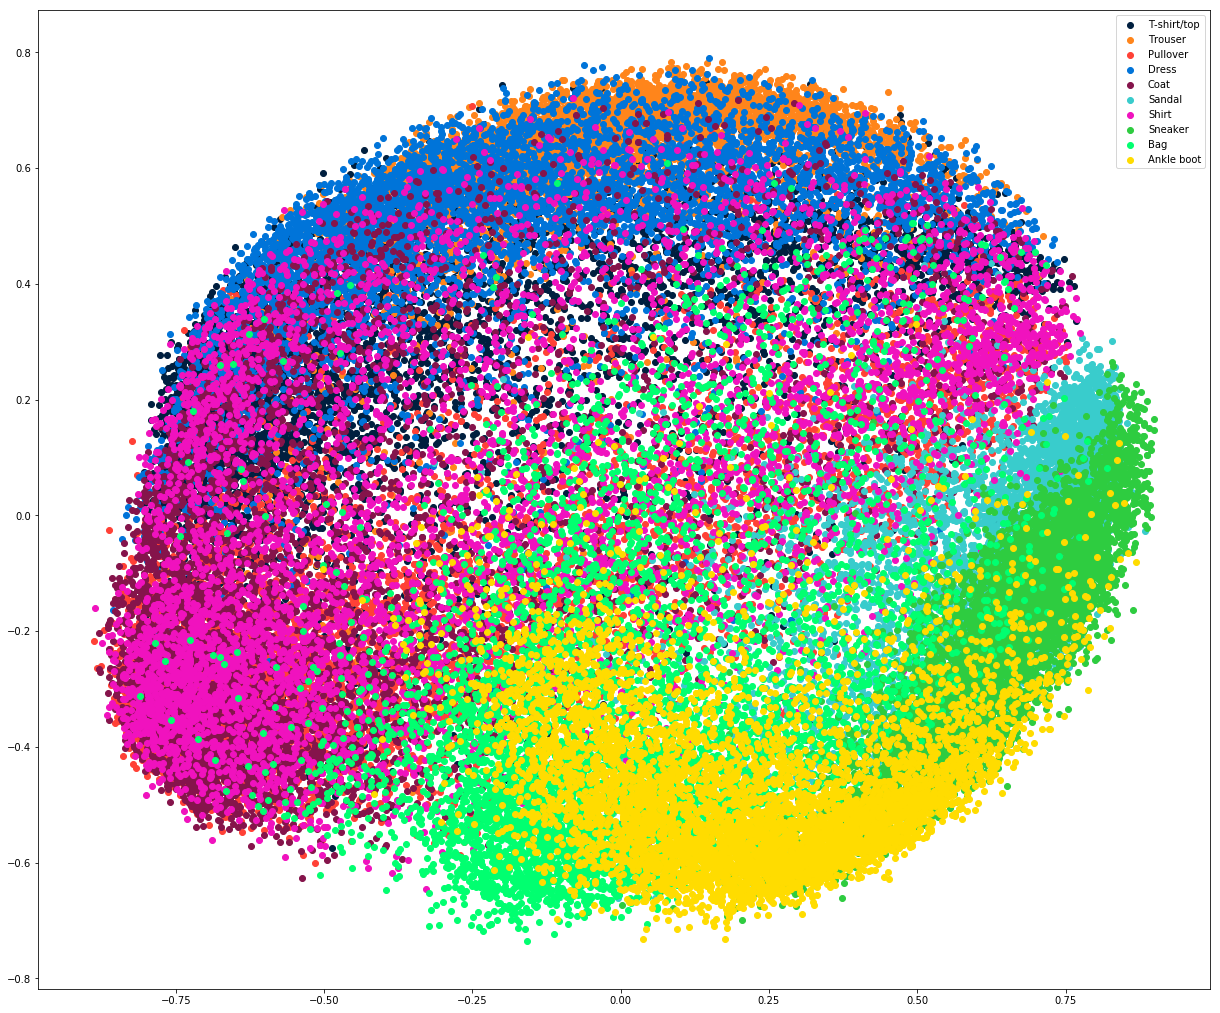

In [5]:
### visualizacion de datos de entrenamiento

# defined labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
         'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# defined colors, i love this one
colors = ['rgb(0,31,63)', 'rgb(255,133,27)', 'rgb(255,65,54)', 'rgb(0,116,217)', 'rgb(133,20,75)', 'rgb(57,204,204)',
'rgb(240,18,190)', 'rgb(46,204,64)', 'rgb(1,255,112)', 'rgb(255,220,0)',
'rgb(76,114,176)', 'rgb(85,168,104)', 'rgb(129,114,178)', 'rgb(100,181,205)']


df_copy_images_ = StandardScaler().fit_transform(X_train)
# push the data to different boundary
df_copy_images_ = Normalizer().fit_transform(df_copy_images_)
df_copy_images_component = PCA(n_components = 2).fit_transform(df_copy_images_)

plt.rcParams["figure.figsize"] = [21, 18]
for k, i in enumerate(class_names):
    plt.scatter(df_copy_images_component[y_train == i, 0],
               df_copy_images_component[y_train == i, 1],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]), 
                label = labels[k])
plt.legend()
plt.show()


In [ ]:
#normalizamos los datos de entrenamiento y test
X_train = Normalizer().fit_transform(X_train)
X_test = Normalizer().fit_transform(X_test)

In [6]:
### Entrenamos la maquina Dummy ###
from sklearn.dummy import DummyClassifier

comienzo = timer()

clf = DummyClassifier(strategy='prior',random_state=0)
clf.fit(X_train, y_train)

fin = timer() - comienzo
print("Tiempo Entrenamiento Dummy:",fin, " segundos")


('Tiempo Entrenamiento Dummy:', 0.004128932952880859, ' segundos')


('Tiempo Test Dummy:', 0.0002598762512207031, ' segundos')
Normalized confusion matrix
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
             precision    recall  f1-score   support

          0       0.10      1.00      0.18      1000
          1       0.00      0.00      0.00      1000
          2       0.00      0.00      0.00      1000
          3       0.00      0.00      0.00      1000
          4       0.00      0.00      0.00      1000
          5       0.00      0.00      0.00      1000
          6       0.00      0.00      0.00      1000
          7       0.00      0.00      0.00      1000
    

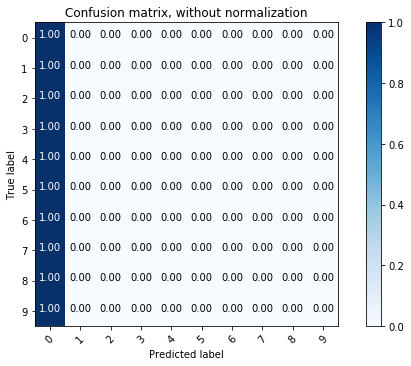

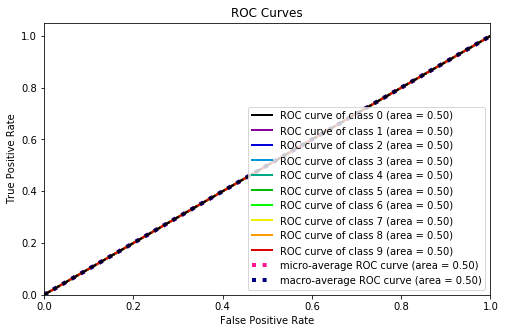

In [8]:
### Clasificamos Dummy ###

comienzo = timer()

dummy_predict = clf.predict(X_test)

fin = timer() - comienzo
print("Tiempo Test Dummy:",fin, " segundos")

cnf_matrix = confusion_matrix(y_test, dummy_predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

print(classification_report(y_test, dummy_predict))

# ploteamos roc curve
skplt.metrics.plot_roc_curve(y_test,clf.predict_proba(X_test))
plt.show()

In [ ]:
### Entrenamos la maquina SVM ###
from sklearn import svm

comienzo = timer()

svc = svm.SVC(kernel='poly', degree=2, C=1.0, probability=True)
svc.fit(X_train, y_train)  

fin = timer() - comienzo
print("Tiempo Entrenamiento SVM:",fin, " segundos")


In [ ]:
### Clasificamos SVM ###

comienzo = timer()

y_predict = svc.predict(X_test)

fin = timer() - comienzo
print("Tiempo Test SVM:",fin, " segundos")

cnf_matrix = confusion_matrix(y_test, y_predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

print(classification_report(y_test, y_predict))

# ploteamos roc curve
skplt.metrics.plot_roc_curve(y_test,svc.predict_proba(X_test))
plt.show()


In [9]:
### Entrenamos la maquina RandomForest ###
from sklearn.ensemble import RandomForestClassifier

comienzo = timer()

rf = RandomForestClassifier() # Creando el modelo
rf.fit(X_train, y_train) # Ajustando el modelo

fin = timer() - comienzo
print("Tiempo Entrenamiento RandomForest:",fin, " segundos")


('Tiempo Entrenamiento RandomForest:', 6.809821844100952, ' segundos')


('Tiempo Test RandomForest:', 0.05573081970214844, ' segundos')
Normalized confusion matrix
[[ 0.848  0.001  0.013  0.031  0.005  0.001  0.091  0.     0.01   0.   ]
 [ 0.009  0.96   0.003  0.019  0.004  0.     0.004  0.     0.001  0.   ]
 [ 0.017  0.     0.773  0.008  0.123  0.     0.075  0.     0.004  0.   ]
 [ 0.033  0.009  0.01   0.881  0.035  0.     0.03   0.     0.002  0.   ]
 [ 0.004  0.     0.14   0.038  0.75   0.     0.067  0.     0.001  0.   ]
 [ 0.     0.     0.     0.001  0.     0.956  0.     0.03   0.003  0.01 ]
 [ 0.182  0.002  0.122  0.037  0.106  0.001  0.533  0.     0.017  0.   ]
 [ 0.     0.     0.     0.     0.     0.026  0.     0.933  0.001  0.04 ]
 [ 0.005  0.002  0.008  0.004  0.005  0.004  0.008  0.006  0.957  0.001]
 [ 0.     0.     0.     0.     0.     0.013  0.001  0.045  0.002  0.939]]
             precision    recall  f1-score   support

          0       0.77      0.85      0.81      1000
          1       0.99      0.96      0.97      1000
          2      

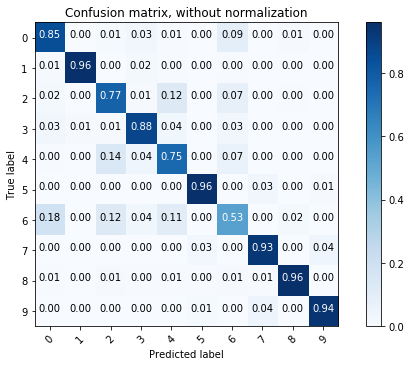

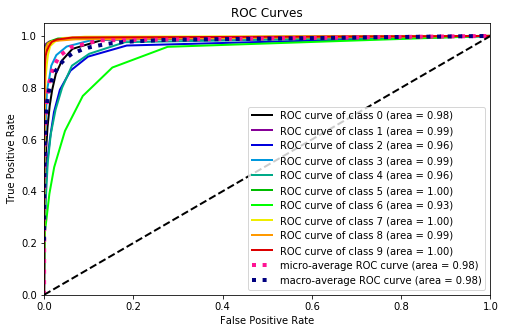

In [10]:
### Clasificamos RandomForest ###

comienzo = timer()

predict = rf.predict(X_test)

fin = timer() - comienzo
print("Tiempo Test RandomForest:",fin, " segundos")


cnf_matrix = confusion_matrix(y_test, predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

print(classification_report(y_test, predict, class_names))

# ploteamos roc curve
skplt.metrics.plot_roc_curve(y_test,rf.predict_proba(X_test))
plt.show()
